<a href="https://colab.research.google.com/github/fsolemauri/pattern-recognition/blob/main/2_image_processing/2_1_Point_operators_MyCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M0.532 · Pattern Recognition</p>
<p style="margin: 0; text-align:right;">Computational Engineering and Mathematics Master</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Computers, Multimedia and Telecommunications Department</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

## Point operators in image processing
This notebook covers **point operations**, a fundamental technique in **pattern recognition** where pixel values are modified independently without considering neighboring pixels.
## Libraries used
- `cv2` (OpenCV) → For image processing
- `google.colab.patches` → For displaying images in Google Colab
- `matplotlib.pyplot` → For visualizing histograms

# 1. Import images and get information

--2025-02-22 15:57:45--  https://github.com/opencv/opencv/blob/244ba1a61a8a514dbd6014766dc17dfde4560487/samples/data/aero3.jpg?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/opencv/opencv/raw/244ba1a61a8a514dbd6014766dc17dfde4560487/samples/data/aero3.jpg [following]
--2025-02-22 15:57:45--  https://github.com/opencv/opencv/raw/244ba1a61a8a514dbd6014766dc17dfde4560487/samples/data/aero3.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/244ba1a61a8a514dbd6014766dc17dfde4560487/samples/data/aero3.jpg [following]
--2025-02-22 15:57:45--  https://raw.githubusercontent.com/opencv/opencv/244ba1a61a8a514dbd6014766dc17dfde4560487/samples/data/aero3.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.10

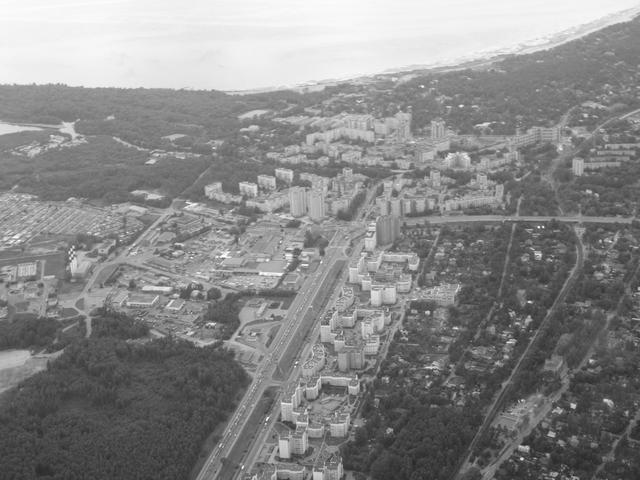

Type of img: <class 'numpy.ndarray'>
Image Dimensions (Height, Width): (480, 640)
Pixel Data Type: uint8
Min pixel value: 36
Max pixel value: 255


In [1]:
# Import OpenCV for image processing
import cv2

# Import Google Colab's image display function
from google.colab.patches import cv2_imshow

# Import Matplotlib for plotting histograms
import matplotlib.pyplot as plt

# We will download an image directly from OpenCV's repository
# and read it in grayscale mode:
# https://github.com/opencv/opencv/tree/master/samples/data

# Download an image from OpenCV's sample dataset
# with wget we obtain the image from the OpenCV repo
#(Get to Colab directly, look at "Files" in the left menu after executing)
!wget https://github.com/opencv/opencv/blob/244ba1a61a8a514dbd6014766dc17dfde4560487/samples/data/aero3.jpg?raw=true -O aero3.jpg

# Read the image in grayscale
img = cv2.imread('aero3.jpg', cv2.IMREAD_GRAYSCALE)

# Display the image
cv2_imshow(img)

# Before applying transformations, let's check the image type and dimensions.

# Print the type of the image
print("Type of img:", type(img))

# Print image dimensions
print("Image Dimensions (Height, Width):", img.shape)

# Print data type of pixel values
print("Pixel Data Type:", img.dtype)

# Get min and max pixel values
print("Min pixel value:", img.min())
print("Max pixel value:", img.max())



# 2. Modify images

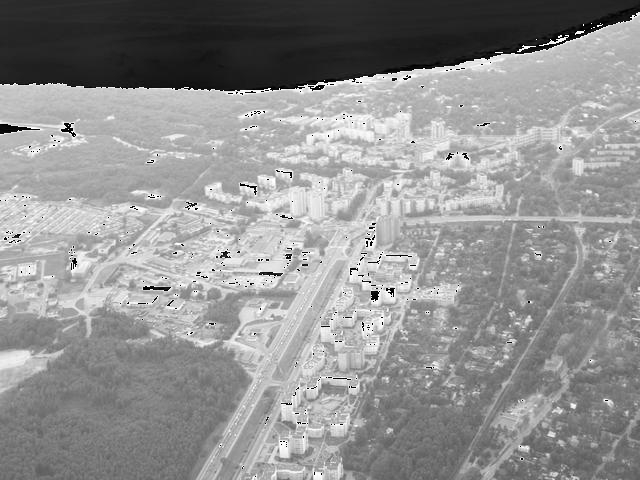

In [2]:
# To brighten the image, we add 50 to each pixel's value

# Increase brightness by adding 50 to each pixel
img_2 = img + 50

# Show the brightened image
cv2_imshow(img_2)


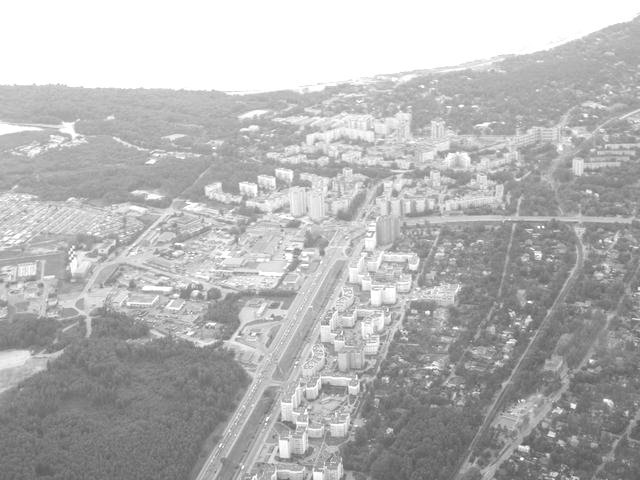

In [3]:
# Some pixels have gone from white (pixel values near to 255) to black (pixel values near to 0)

# Increase brightness by adding 50 to each pixel
img_brighter = cv2.add(img, 50)

# Show the brightened image
cv2_imshow(img_brighter)

# Why use cv2.add() instead of img + 50?
# Safer! Prevents values from exceeding 255 (max brightness).
# img + 50 would cause pixel overflow, which wraps values back to 0 (causing artifacts).

## **Histogram equalization for contrast enhancement**
Histogram equalization redistributes pixel intensities **to improve contrast**. We adjust the contrast of the image modifying the image's histogram:




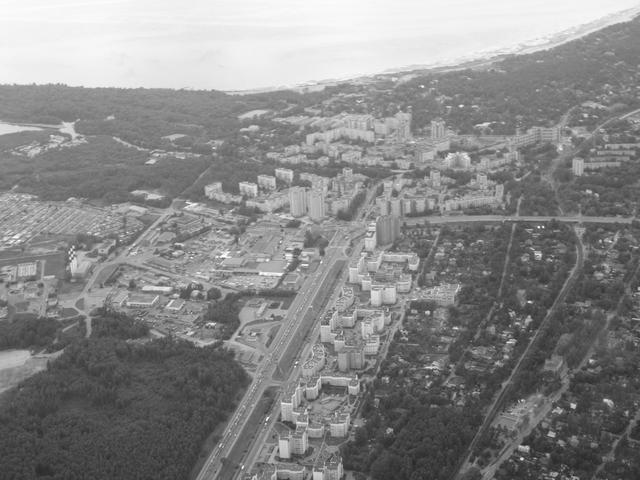

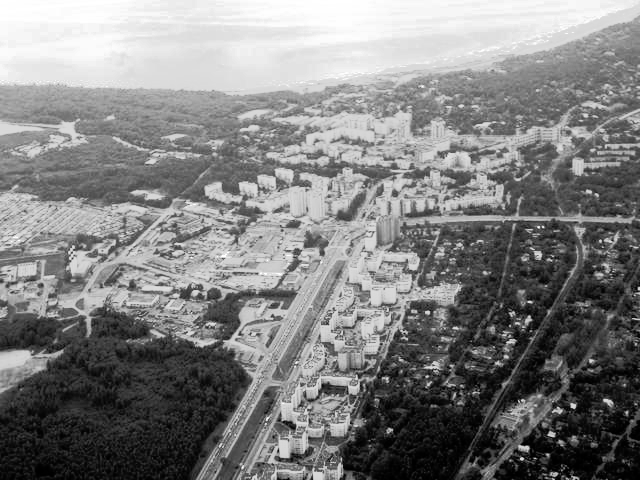

In [4]:
# Apply histogram equalization to the original image
# Adjusts the distribution of pixel intensities to enhance contrast.
# Useful for low-light images where details are hidden in shadows.

img_equalized = cv2.equalizeHist(img)

# Display original and equalized images
cv2_imshow(img)
cv2_imshow(img_equalized)


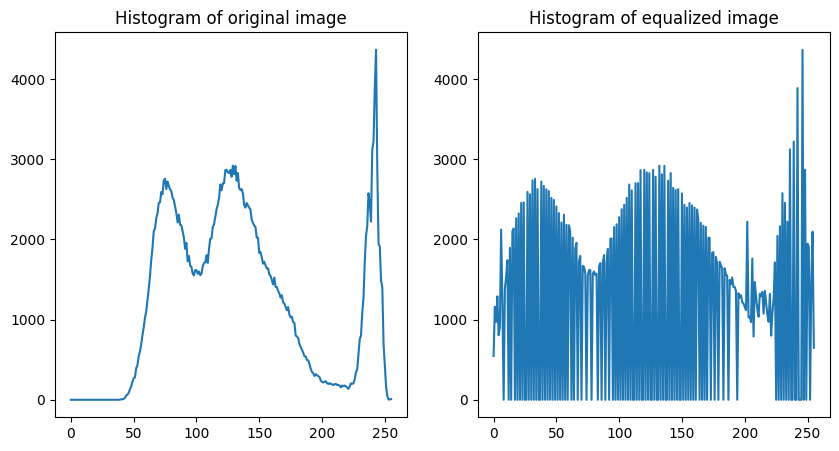

In [5]:
# Visualizing the histogram before and after equalization
# We plot histograms to see how pixel values are distributed.

# Importing required libraries of opencv
import cv2

# Importing library for plotting
from matplotlib import pyplot as plt

# Compute histogram of original image. Find frequency of pixels in range 0-255
hist_original = cv2.calcHist([img], [0], None, [256], [0,256])

# Compute histogram of equalized image
hist_equalized = cv2.calcHist([img_equalized], [0], None, [256], [0,256])

# Plot both histograms
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist_original)
plt.title("Histogram of original image")

plt.subplot(1,2,2)
plt.plot(hist_equalized)
plt.title("Histogram of equalized image")

plt.show()

# The original histogram didn't have any pixel with values below 45, the equalization changed pixel values to have a flatter histogram.